In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.astype('float64')
print(df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [6]:
df['Type'] = df.Type.astype('float64')

In [7]:
df['Type'].sum()

595.0

In [8]:
df['Type'].unique()

array([1., 2., 3., 5., 6., 7.])

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Değerler')

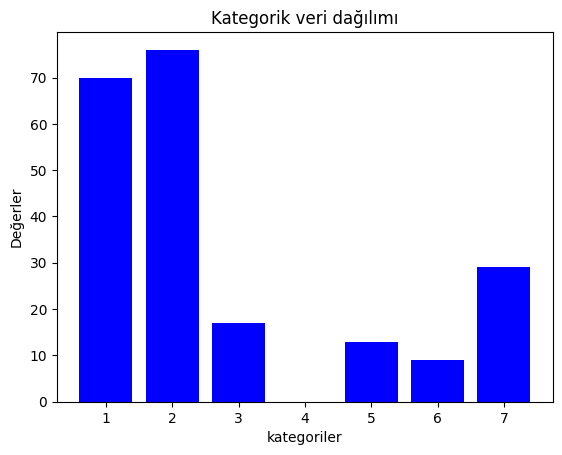

In [11]:
type_counts = df['Type'].value_counts()
plt.bar(type_counts.index,type_counts,color = "blue")
plt.title("Kategorik veri dağılımı")
plt.xlabel("kategoriler")
plt.ylabel("Değerler")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


In [13]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [33]:
x = df.drop('Type',axis=1)
y = df['Type'] -1
y=to_categorical(y,num_classes=7)
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=42)

In [34]:
print(x_train.shape)
print(y_train.shape)

(171, 9)
(171, 7)


In [35]:
model = Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(7,activation='softmax'))

In [36]:
print(help(model.compile))

Help on method compile in module keras.engine.training:

compile(optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None, jit_compile=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    Example:
    
    ```python
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.keras.metrics.BinaryAccuracy(),
                           tf.keras.metrics.FalseNegatives()])
    ```
    
    Args:
        optimizer: String (name of optimizer) or optimizer instance. See
          `tf.keras.optimizers`.
        loss: Loss function. May be a string (name of loss function), or
          a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
          function is any callable with the signature `loss = fn(y_true,
          y_pred)`, where `y_true` 

In [37]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [39]:
model.fit(x_train,y_train,epochs=512,batch_size=16,validation_split=0.24)

Epoch 1/512
9/9 [==============================] - 0s 12ms/step - loss: 0.6586 - accuracy: 0.7519 - val_loss: 1.4467 - val_accuracy: 0.5952
Epoch 2/512
9/9 [==============================] - 0s 10ms/step - loss: 0.7426 - accuracy: 0.6589 - val_loss: 1.3713 - val_accuracy: 0.5714
Epoch 3/512
9/9 [==============================] - 0s 8ms/step - loss: 0.6693 - accuracy: 0.7209 - val_loss: 1.5558 - val_accuracy: 0.5238
Epoch 4/512
9/9 [==============================] - 0s 6ms/step - loss: 0.7534 - accuracy: 0.6589 - val_loss: 1.4415 - val_accuracy: 0.6190
Epoch 5/512
9/9 [==============================] - 0s 7ms/step - loss: 0.6736 - accuracy: 0.7364 - val_loss: 1.3244 - val_accuracy: 0.5238
Epoch 6/512
9/9 [==============================] - 0s 7ms/step - loss: 0.6716 - accuracy: 0.6977 - val_loss: 1.3431 - val_accuracy: 0.6429
Epoch 7/512
9/9 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.6512 - val_loss: 1.4568 - val_accuracy: 0.5952
Epoch 8/512
9/9 [========

In [40]:
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=2)
print(f'Test accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')

2/2 - 0s - loss: 0.9314 - accuracy: 0.6744 - 31ms/epoch - 16ms/step
Test accuracy: 0.674
Test loss: 0.931


In [41]:
import tensorflow as tf
predictions = model.predict(x_test[:5])
predicted_classes = tf.argmax(predictions, axis=1)
print("Predicted classes:", predicted_classes.numpy())

1/1 [==============================] - 0s 96ms/step
Predicted classes: [0 6 0 6 1]


In [43]:
x_test.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17


In [75]:
tahmin1 = x_test.iloc[[0]]
sonuc1 = model.predict(tahmin1)

1/1 [==============================] - 0s 16ms/step


In [76]:
sonuc1.argmax()

0

In [77]:
tahmin2 = x_test.iloc[[1]]
sonuc2 = model.predict(tahmin2)

1/1 [==============================] - 0s 14ms/step


In [78]:
sonuc2.argmax()

6

In [80]:
tahmin3 = x_test.iloc[[2]]
sonuc3 = model.predict(tahmin3)

1/1 [==============================] - 0s 16ms/step


In [81]:
sonuc3.argmax()

0

In [83]:
tahmin4 = x_test.iloc[[4]]
sonuc4 = model.predict(tahmin4)

1/1 [==============================] - 0s 23ms/step


In [84]:
sonuc4.argmax()

1

In [82]:
y_test

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 